In [51]:
import numpy as np
import pandas as pd


!pip install --upgrade seaborn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

!pip install xgboost
import xgboost as xgb

!pip install keras
!pip install tensorflow
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv('/Users/sharvilwadekar/Desktop/Data Science/ML/Solar Irradiance Prediction/SolarPrediction.csv')

In [3]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


## Data Wrangling

In [5]:
df = data.copy()

In [6]:
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [7]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [10]:
df['risehour'] = df['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['riseminute'] = df['TimeSunRise'].apply(lambda x: re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
df['sethour'] = df['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunRise'].apply(lambda x: re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [11]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,6,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,6,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,6,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,6,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,6,13


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  Month                   32686 non-null  int32  
 12  Day                     32686 non-null  int32  
 13  Hour                    32686 non-null  int32  
 14  Minute                  32686 non-null

In [13]:
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis =1, inplace = True)

In [14]:
df.shape

(32686, 15)

In [15]:
df.isnull().sum().sum()

0

In [16]:
input_features = df.drop(['Radiation'], axis = 1)
target = df['Radiation']

In [17]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,6,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,6,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,6,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,6,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,6,13


## Feature Selection using Correlation Matrix

In [18]:
corr_matrix = df.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,NaN,-0.092850
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,NaN,-0.380968
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,NaN,-0.380399
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,NaN,-0.023955
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,NaN,0.176929
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,NaN,0.167075
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,NaN,0.952472
Day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,NaN,0.274522
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,NaN,-0.006772
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,NaN,-0.000158


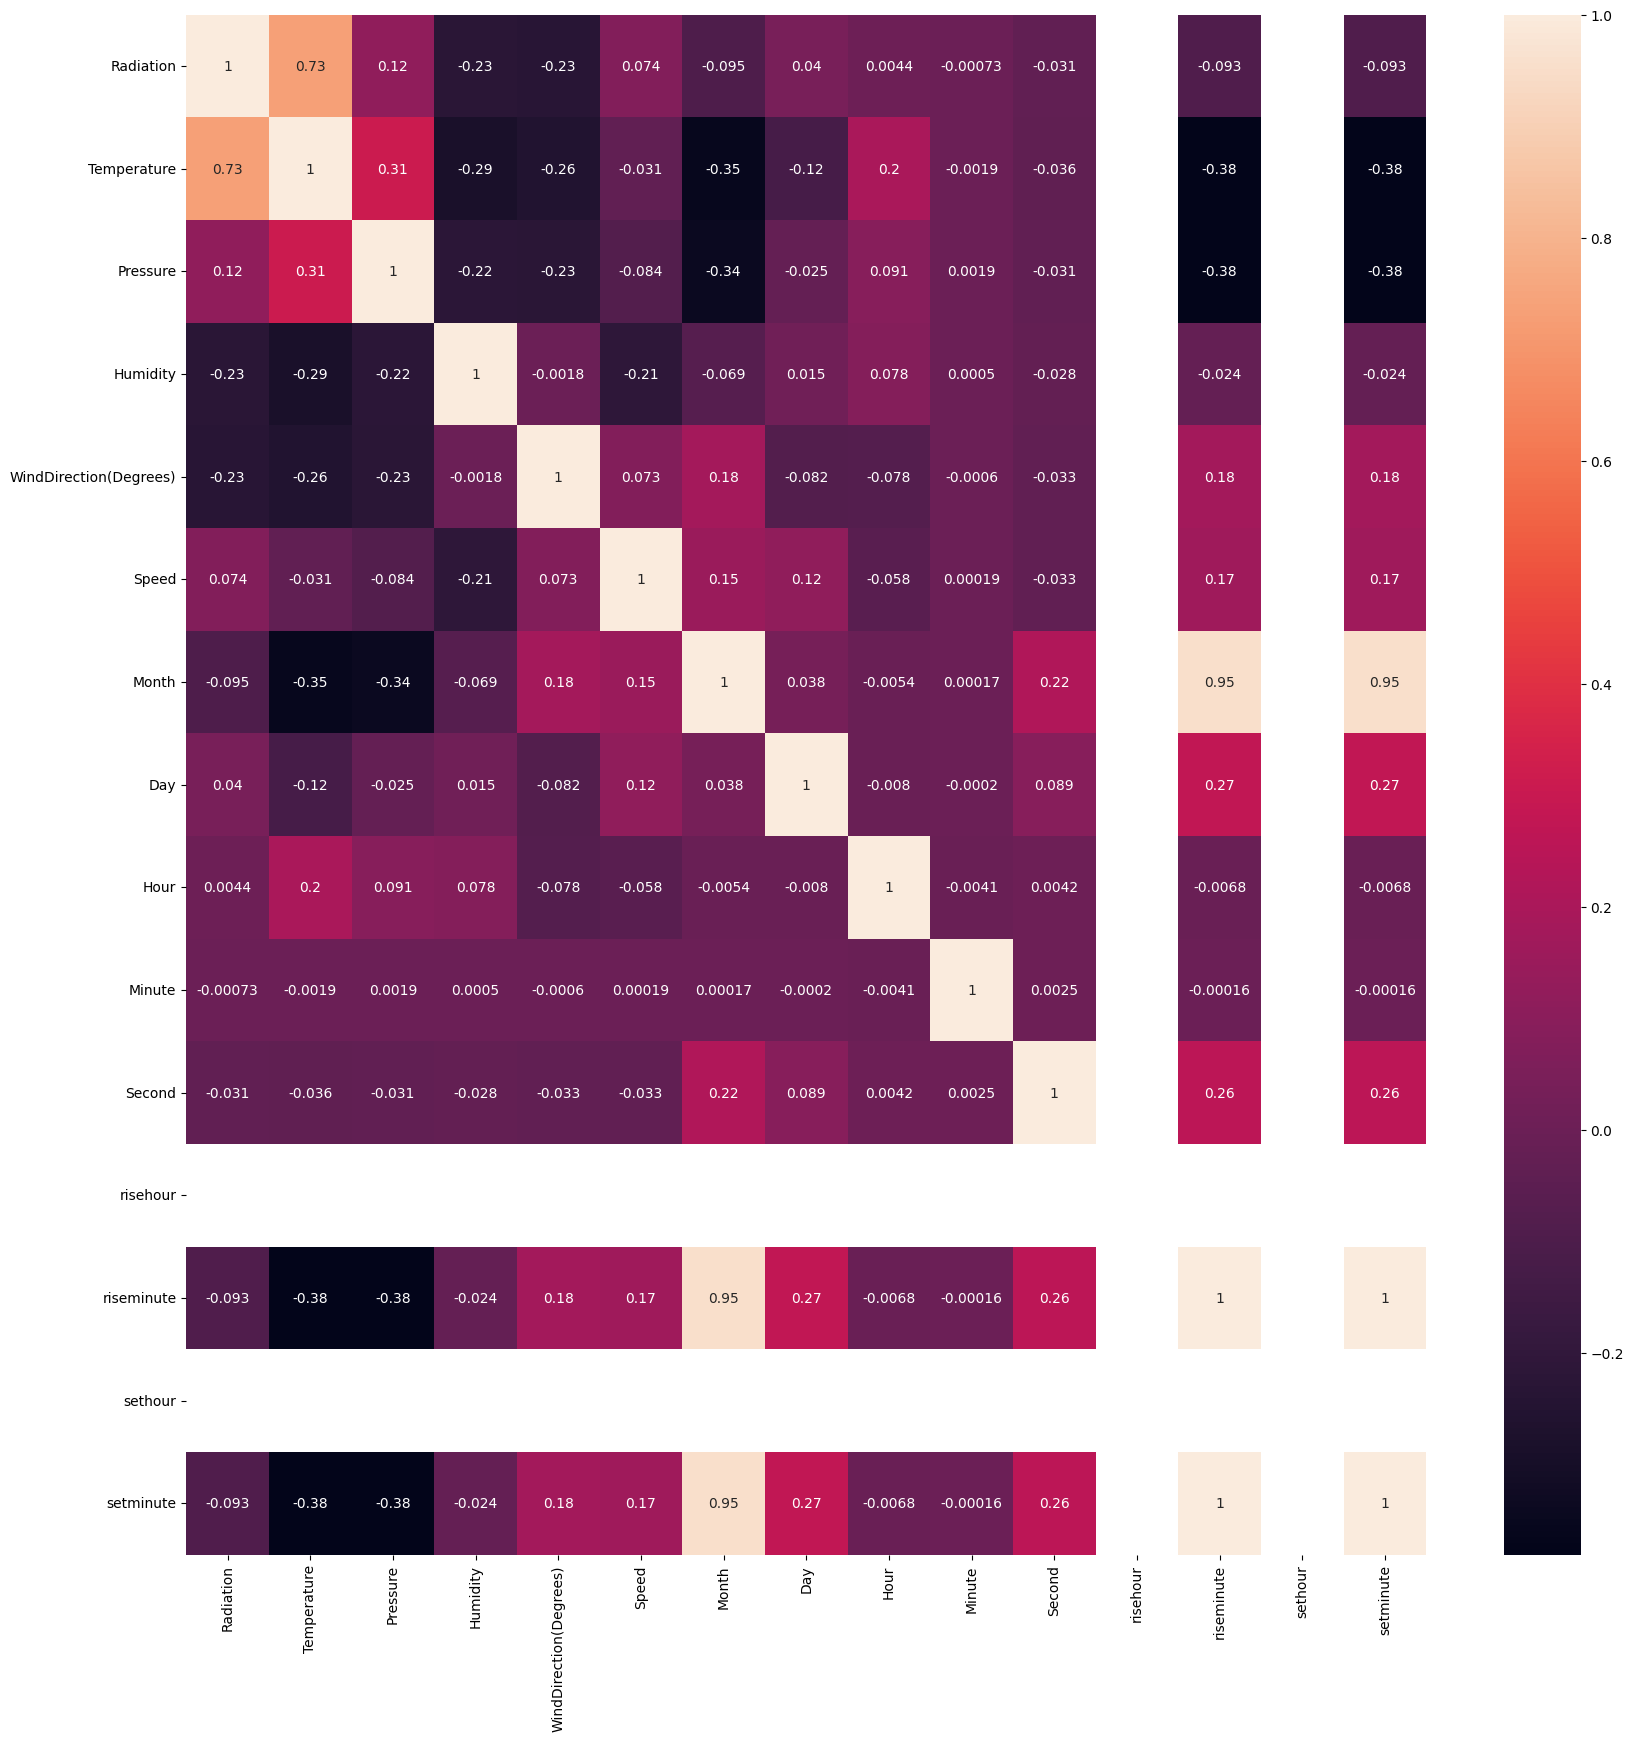

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()
display()

## Feature Selection using SelectKBest Method

In [20]:
bestfeatures = SelectKBest(score_func = chi2, k=10)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_Y = label_encoder.fit_transform(target)

In [22]:
target[:5]

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [23]:
target_cont = df['Radiation'].apply(lambda x: int(x*100))

In [24]:
target_cont

0        121
1        121
2        123
3        121
4        117
        ... 
32681    122
32682    117
32683    120
32684    123
32685    120
Name: Radiation, Length: 32686, dtype: int64

In [25]:
scaled_input_features = MinMaxScaler().fit_transform(input_features)
fit = bestfeatures.fit(input_features, target_cont)

In [26]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input_features.columns)

In [27]:
featureScores = pd.concat([column, scores], axis = 1)

In [28]:
featureScores.columns = ['Features', 'feature_imp']

In [29]:
featureScores.sort_values(by = 'feature_imp', ascending= False, inplace= True)

In [30]:
featureScores

,Features,feature_imp
3,WindDirection(Degrees),1.176661e+06
8,Minute,1.540396e+05
11,riseminute,1.499121e+05
13,setminute,1.499121e+05
9,Second,1.350317e+05
2,Humidity,1.347792e+05
6,Day,7.987053e+04
4,Speed,3.101732e+04
0,Temperature,2.045311e+04
7,Hour,1.589726e+04


<function matplotlib.pyplot.show(close=None, block=None)>

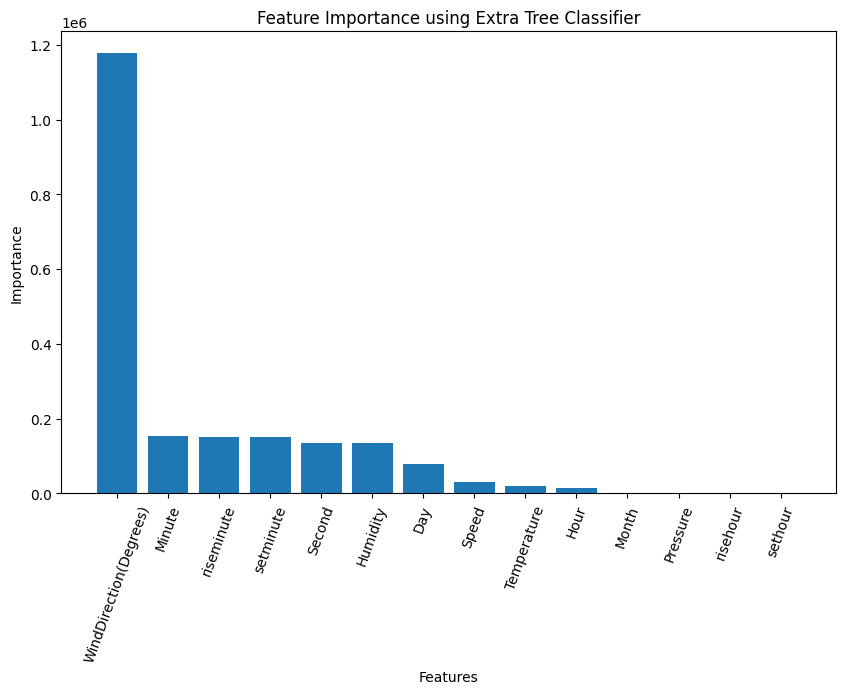

In [31]:
plt.figure(figsize = (10,6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Classifier")
plt.show

## Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

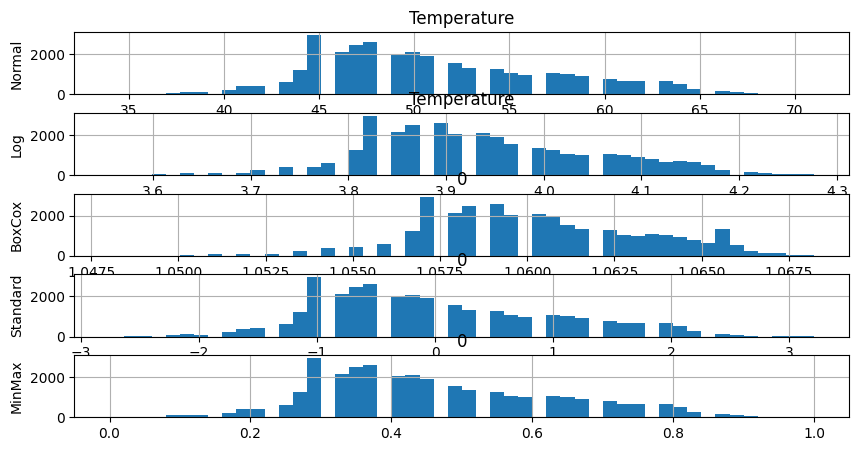

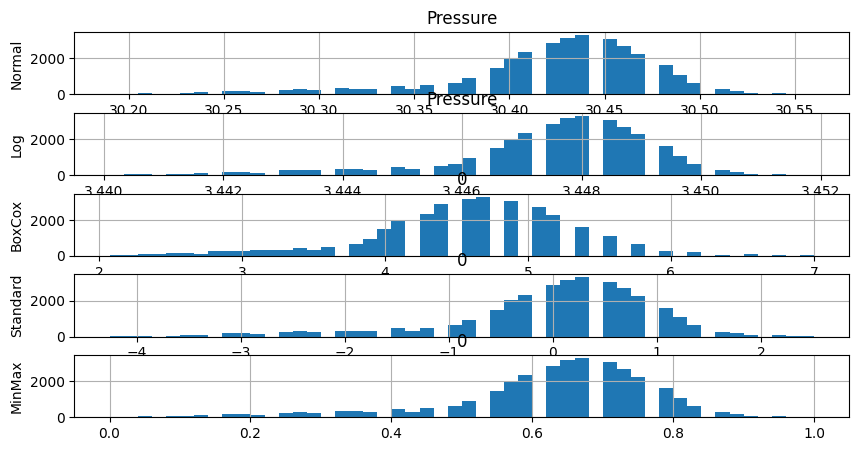

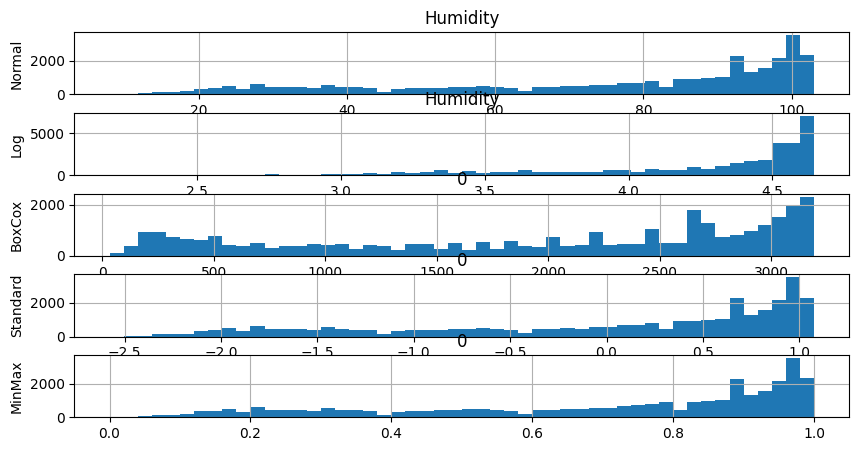

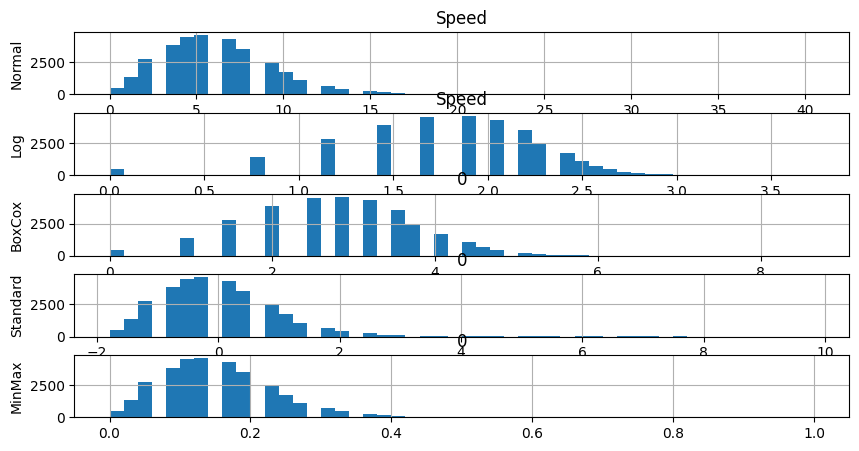

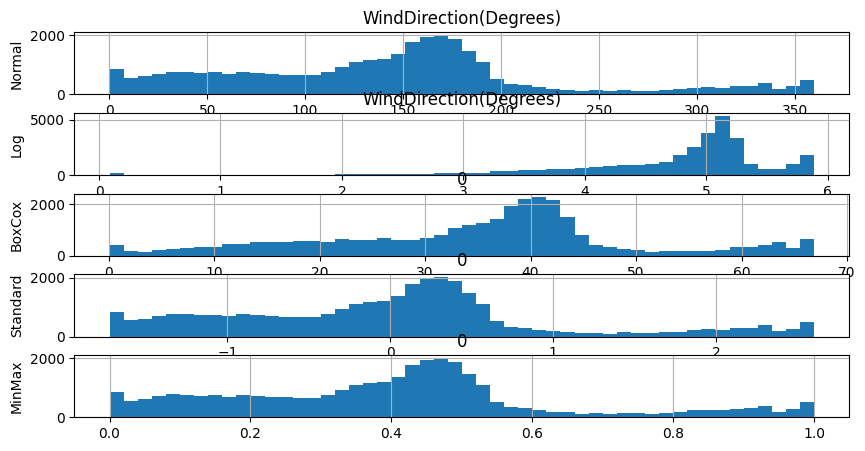

In [34]:
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize = (10,5))
    
    pd.DataFrame(input_features[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((input_features[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax = ax3, bins = 50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(input_features[i]).reshape(-1,1))).hist(ax = ax4, bins = 50)    
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input_features[i]).reshape(-1,1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel("Normal")
    ax2.set_ylabel("Log")
    ax3.set_ylabel("BoxCox")
    ax4.set_ylabel("Standard")
    ax5.set_ylabel("MinMax")
    

In [35]:
transform = {'Temperature': (input_features['Temperature']+1).transform(np.log),
            'Pressure': stats.boxcox(input_features['Pressure']+1)[0],
            'Humidity': stats.boxcox(input_features['Humidity']+1)[0],
            'Speed': (input_features['Temperature']+1).transform(np.log),
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(input_features['WindDirection(Degrees)']).reshape(-1,1)) 
            }

In [36]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,6,13
1,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,6,13
2,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,6,13
3,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,6,13
4,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,6,13


In [37]:
for i in transform:
    input_features[i] = transform[i]

In [38]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,3.89182,5.044903e+152,1139.358665,0.492692,3.89182,9,29,23,55,26,6,13,6,13
1,3.89182,5.044903e+152,1104.046980,0.490996,3.89182,9,29,23,50,23,6,13,6,13
2,3.89182,5.044903e+152,1069.253545,0.440894,3.89182,9,29,23,45,26,6,13,6,13
3,3.89182,5.044903e+152,1175.187489,0.382426,3.89182,9,29,23,40,21,6,13,6,13
4,3.89182,5.044903e+152,1248.392213,0.291391,3.89182,9,29,23,35,24,6,13,6,13


## Preparing data - Standardisation and Splitting

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(input_features, target, test_size = 0.2, random_state = 1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [40]:
xtrain.shape, xtest.shape

((26148, 14), (6538, 14))

## XGBoost

In [42]:
from xgboost import XGBRegressor

params = {
    "learning_rate": 0.1,
    "max_depth": 8
}

model = XGBRegressor(**params)

In [43]:
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = model.predict(xtest)

In [45]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("Testing performance")

print("RMSE: {:2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 82.115053
R2: 0.93


## Using MultiLayer Perceptron for prediction

In [46]:
input_features.shape

(32686, 14)

In [47]:
model = None
model = Sequential()

model.add(Dense(128, activation = "relu", input_dim = 14))
model.add(Dropout(0.33))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.33))

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.33))

model.add(Dense(1, activation = "relu"))

model.compile(metrics='mse', loss = 'mae', optimizer = Adam(learning_rate = 0.001))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [48]:
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs = 50, batch_size=32)

Epoch 1/50
736/736 [==============================] - 1s 470us/step - loss: 117.1802 - mse: 51391.3789 - val_loss: 82.7663 - val_mse: 25210.0410
Epoch 2/50
736/736 [==============================] - 0s 402us/step - loss: 86.2296 - mse: 28185.4258 - val_loss: 71.9383 - val_mse: 19778.6230
Epoch 3/50
736/736 [==============================] - 0s 407us/step - loss: 80.2101 - mse: 24521.1328 - val_loss: 67.4767 - val_mse: 17424.9980
Epoch 4/50
736/736 [==============================] - 0s 404us/step - loss: 78.1317 - mse: 23248.4316 - val_loss: 62.5876 - val_mse: 15370.2852
Epoch 5/50
736/736 [==============================] - 0s 403us/step - loss: 74.8592 - mse: 21552.7480 - val_loss: 60.5032 - val_mse: 14743.7412
Epoch 6/50
736/736 [==============================] - 0s 405us/step - loss: 72.3078 - mse: 20250.9883 - val_loss: 55.8368 - val_mse: 13153.8496
Epoch 7/50
736/736 [==============================] - 0s 407us/step - loss: 70.7878 - mse: 19758.8457 - val_loss: 55.9002 - val_mse: 13

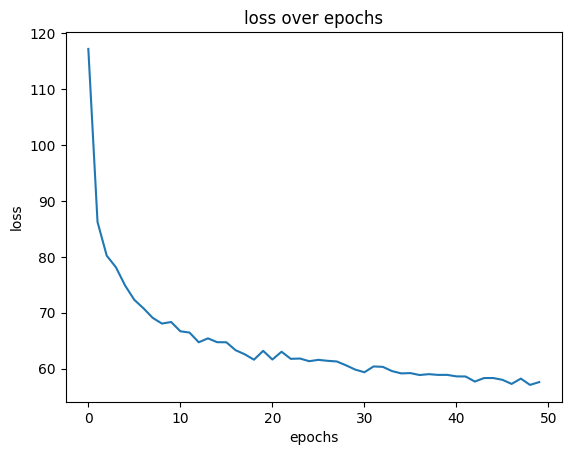

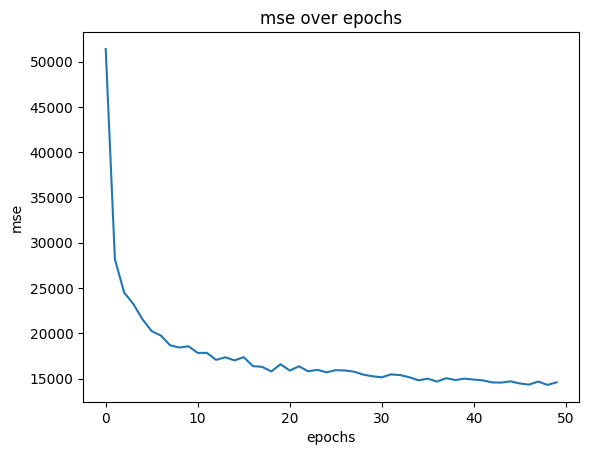

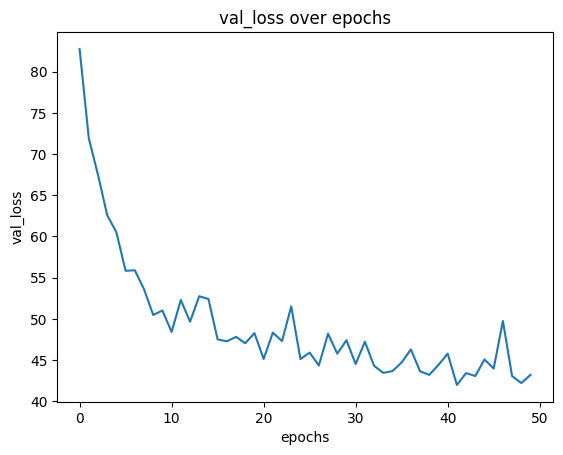

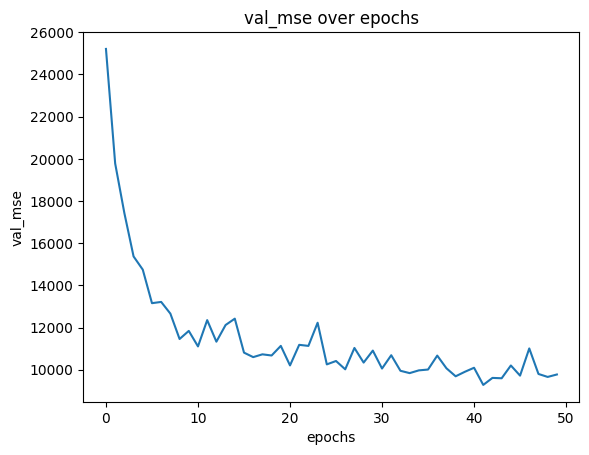

In [49]:
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [50]:
y_pred = model.predict(xtest)

205/205 [==============================] - 0s 267us/step


In [52]:
mean_absolute_error(ytest, model.predict(xtest))

205/205 [==============================] - 0s 251us/step


41.41076447898148